<a href="https://colab.research.google.com/github/rbbh/ARIMA-playground/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.0MB/s 


In [0]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [69]:
from google.colab import files
uploaded = files.upload()

Saving gas.txt to gas.txt


In [0]:
import io
import pandas as pd

# Un-comment the line for the data base that
# you want to predict

#data = pd.read_csv(io.BytesIO(uploaded['airlines2.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['DadosONS.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['carsales.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['coloradoRiver.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['accidentalDeathUSA.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['electric.txt']))
data = pd.read_csv(io.BytesIO(uploaded['gas.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['lakeerie.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['milk.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['redwine.txt']))

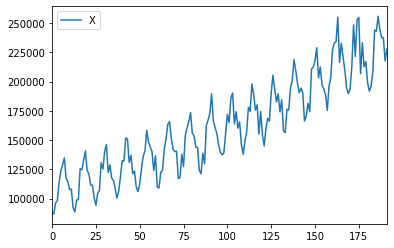

In [71]:
data.plot()

In [0]:
data_n = data.copy()
data_n = data_n/data_n.max()

In [73]:
len(data)

192

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Usin

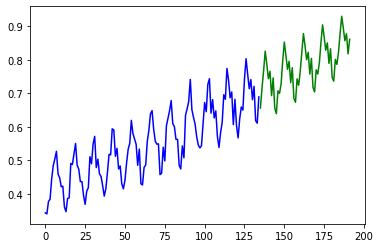

In [74]:
# Load/split the data
train, test = train_test_split(data_n, train_size=135)

# Fit the model
model = pm.auto_arima(train, seasonal=True, m=12)

# Make the forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(data_n.shape[0])
plt.plot(x[:135], train, c='blue')
plt.plot(x[135:], forecasts, c='green')
plt.show()

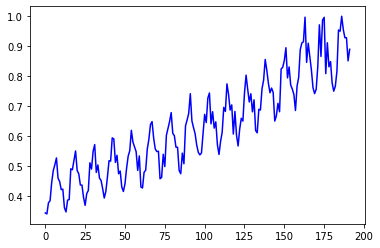

In [75]:
x = np.arange(data.shape[0])
plt.plot(x, data_n, c='blue')
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error

In [77]:
mse = mean_squared_error(forecasts, test)
print(mse)

0.003961970375636738


In [0]:
# Extra packages for if the traditional prediction
# method doesn't work

from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pickle

In [79]:
# Define and fit the pipeline
pipeline = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),  # lmbda2 avoids negative values
    ('arima', pm.AutoARIMA(seasonal=True, m=12,
                           suppress_warnings=True,
                           trace=True))
])

pipeline.fit(train)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=-478.679, BIC=-455.496, Fit time=1.160 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=-353.258, BIC=-347.462, Fit time=0.042 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=-511.112, BIC=-499.520, Fit time=0.636 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=-431.727, BIC=-420.135, Fit time=0.351 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=-354.877, BIC=-351.979, Fit time=0.015 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=-352.281, BIC=-343.588, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 0, 12); AIC=-509.165, BIC=-494.676, Fit time=2.666 seconds
Near non-invertible roots for order (1, 1, 0)(2, 0, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.990)
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=-509.211, BIC=-494.721, 

Pipeline(steps=[('boxcox',
                 BoxCoxEndogTransformer(floor=1e-16, lmbda=None, lmbda2=1e-06,
                                        neg_action='raise')),
                ('arima',
                 AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
                           information_criterion='aic', m=12, max_D=1, max_P=2,
                           max_Q=2, max_d=2, max_order=5, max_p=5, max_q=5,
                           maxiter=50, method='lbfgs', n_fits=10, n_jobs=1,
                           offset_test_args=None, out_of_sample_size=0,
                           random=False, random_state=None, scoring='mse',
                           scoring_args=None, seasonal=True,
                           seasonal_test='ocsb', seasonal_test_args=None,
                           start_P=1, start_Q=1, start_p=2, start_params=None, ...))])

In [0]:
# Serializing the model:
with open('model.pkl', 'wb') as pkl:
    pickle.dump(pipeline, pkl)

In [81]:
# Loading it and making predictions seamlessly:
with open('model.pkl', 'rb') as pkl:
    mod = pickle.load(pkl)
    forecasts = mod.predict(57)
    print(forecasts)

[0.67227343 0.75634478 0.79061838 0.83214868 0.84325597 0.77378972
 0.77532416 0.72713081 0.75066371 0.66528297 0.65241928 0.70658422
 0.71924636 0.79281986 0.81865992 0.87865489 0.87817691 0.8071609
 0.8171472  0.76024597 0.78634368 0.7026304  0.68504973 0.74256369
 0.75614555 0.82844531 0.85669014 0.9172828  0.91568096 0.84494485
 0.85454671 0.79644156 0.82365609 0.738127   0.72024564 0.77905022
 0.79253609 0.86605404 0.89485026 0.95610163 0.95459942 0.88289267
 0.89254011 0.83365782 0.86127839 0.77437897 0.75626012 0.81599806
 0.82968805 0.90433784 0.93353025 0.99562557 0.99412522 0.92142649
 0.93122219 0.87150103 0.89952608]


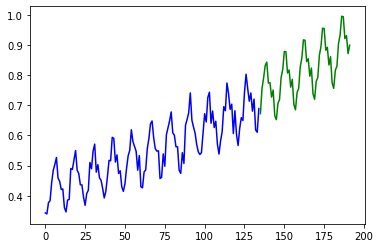

In [82]:
x = np.arange(data_n.shape[0])
plt.plot(x[:135], train, c='blue')
plt.plot(x[135:], forecasts, c='green')
plt.show()

In [83]:
mse = mean_squared_error(forecasts, test)
print(mse)

0.001131748212431729
